## 相关设置

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

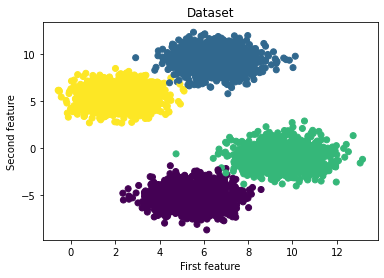

0.993


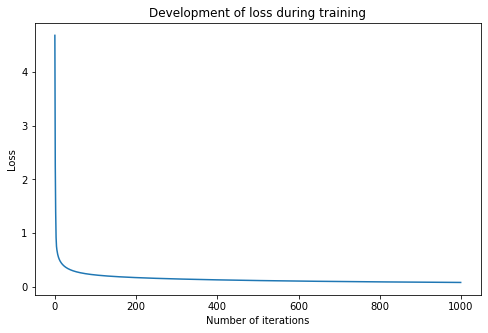

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs


def train_test_split(X, y, test_ratio=0.2, seed=None):
    """分割数据集"""
    if seed:
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test


def gen_dataset():
    np.random.seed(13)
    X, y = make_blobs(centers=4, n_samples = 5000)
    # 绘制数据分布
    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1],c=y)
    plt.title("Dataset")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    outname = "./Datasets" + ".png"
    plt.savefig(outname) # 保存图片
    plt.show()

    # 重塑目标以获得具有 (n_samples, 1)形状的列向量
    y = y.reshape((-1,1))
    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    train_dataset = np.append(X_train,y_train, axis = 1)
    test_dataset = np.append(X_test,y_test, axis = 1)
    np.savetxt("train_dataset.txt", train_dataset, fmt="%.4f %.4f %d")
    np.savetxt("test_dataset.txt", test_dataset, fmt="%.4f %.4f %d")


def load_dataset(file_path):
    dataMat = []
    labelMat = []
    fr = open(file_path)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


def train(data_arr, label_arr, n_class, iters = 1000, alpha = 0.1, lam = 0.01):
    '''
    @description: softmax 训练函数
    @param {type} 
    @return: theta 参数
    '''    
    n_samples, n_features = data_arr.shape
    n_classes = n_class
    # 随机初始化权重矩阵
    weights = np.random.rand(n_class, n_features)
    # 定义损失结果
    all_loss = list()
    # 计算 one-hot 矩阵
    y_one_hot = one_hot(label_arr, n_samples, n_classes)
    for i in range(iters):
        # 计算 m * k 的分数矩阵
        scores = np.dot(data_arr, weights.T)
        # 计算 softmax 的值
        probs = softmax(scores)
        # 计算损失函数值
        loss = - (1.0 / n_samples) * np.sum(y_one_hot * np.log(probs))
        all_loss.append(loss)
        # 求解梯度
        dw = -(1.0 / n_samples) * np.dot((y_one_hot - probs).T, data_arr) + lam * weights
        dw[:,0] = dw[:,0] - lam * weights[:,0]
        # 更新权重矩阵
        weights  = weights - alpha * dw
    return weights, all_loss
        

def softmax(scores):
    # 计算总和
    sum_exp = np.sum(np.exp(scores), axis = 1,keepdims = True)
    softmax = np.exp(scores) / sum_exp
    return softmax


def one_hot(label_arr, n_samples, n_classes):
    one_hot = np.zeros((n_samples, n_classes))
    one_hot[np.arange(n_samples), label_arr.T] = 1
    return one_hot


def predict(test_dataset, label_arr, weights):
    scores = np.dot(test_dataset, weights.T)
    probs = softmax(scores)
    return np.argmax(probs, axis=1).reshape((-1,1))


def myfun():
    data_arr, label_arr = load_dataset('train_dataset.txt')
    data_arr = np.array(data_arr)
    label_arr = np.array(label_arr).reshape((-1,1))
    weights, all_loss = train(data_arr, label_arr, n_class = 4)

    # 计算预测的准确率
    test_data_arr, test_label_arr = load_dataset('test_dataset.txt')
    test_data_arr = np.array(test_data_arr)
    test_label_arr = np.array(test_label_arr).reshape((-1,1))
    n_test_samples = test_data_arr.shape[0]
    y_predict = predict(test_data_arr, test_label_arr, weights)
    accuray = np.sum(y_predict == test_label_arr) / n_test_samples
    print(accuray)

    # 绘制损失函数
    fig = plt.figure(figsize=(8,5))
    plt.plot(np.arange(1000), all_loss)
    plt.title("Development of loss during training")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    outname = "./Loss Function" + ".png"
    plt.savefig(outname) # 保存图片
    plt.show()


def softmax_lib():
    '''
    @description: 使用 sklearn 包调用 softmax 回归函数
    @param {type}
    @return:
    '''
    data_arr, label_arr = load_dataset('train_dataset.txt')
    from sklearn import linear_model
    model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
    model_softmax_regression.fit(data_arr, label_arr)
    test_data_arr, test_label_arr = load_dataset('test_dataset.txt')
    y_predict = model_softmax_regression.predict(test_data_arr)
    accurcy = np.sum(y_predict == test_label_arr) / len(test_data_arr)
    print(accurcy)


if __name__ == "__main__":
    gen_dataset()
    #softmax_lib()
    myfun()